In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings

warnings.filterwarnings("ignore")

# 1) Problem Statement

"Predict whether a customer will subscribe to a term deposit based on their demographic information, financial status, and interaction history with previous and current marketing campaigns. The goal is to build a machine learning model that accurately classifies potential customers as likely or unlikely to subscribe to a term deposit, helping the bank optimize its marketing strategies."

This problem statement focuses on the classification task, where the target variable is whether or not a customer subscribes to a term deposit (y). It also emphasizes the practical application of the model in enhancing the bank's marketing effectiveness.

# 2) Data collection

data source - https://www.kaggle.com/datasets/thedevastator/bank-term-deposit-predictions

# 3) Importing Data and Required Packages

- Pandas

- Numpy

- Matplotlib

- Seaborn

- Warnings

# 4) About dataset
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric)

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")
related with the last contact of the current campaign:

9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)
other attributes:

13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
Output variable (desired target):

17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [4]:
df= pd.read_csv(r"D:\Projects\MLflow project\data\train.csv")

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

<Axes: ylabel='job'>

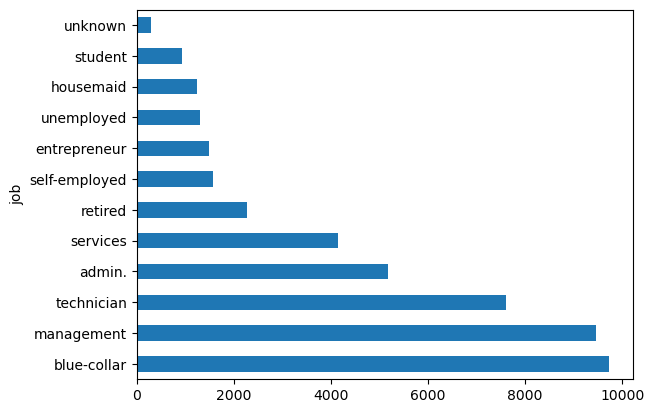

In [32]:
df['job'].value_counts().plot(kind="barh")

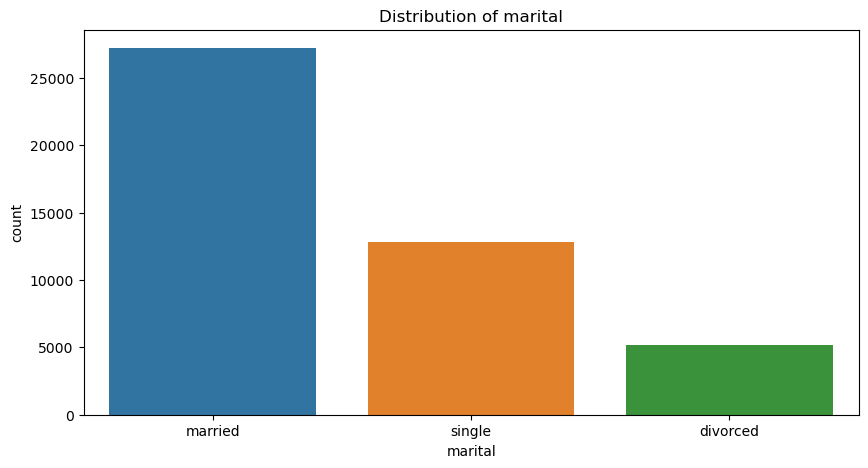

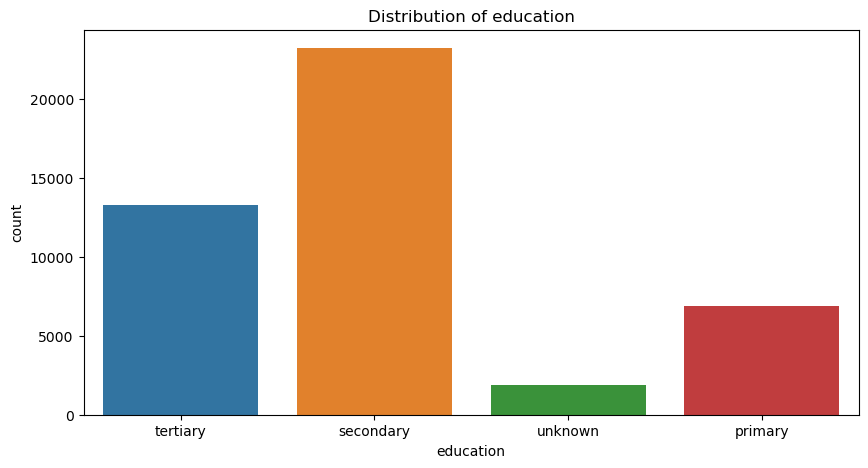

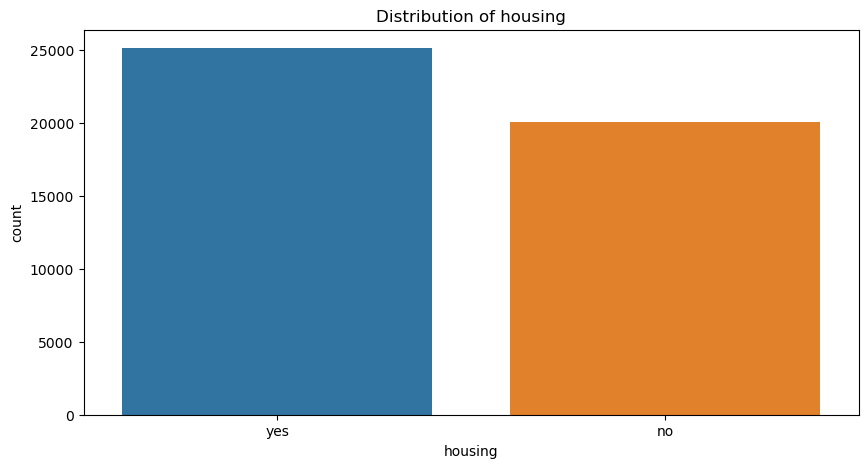

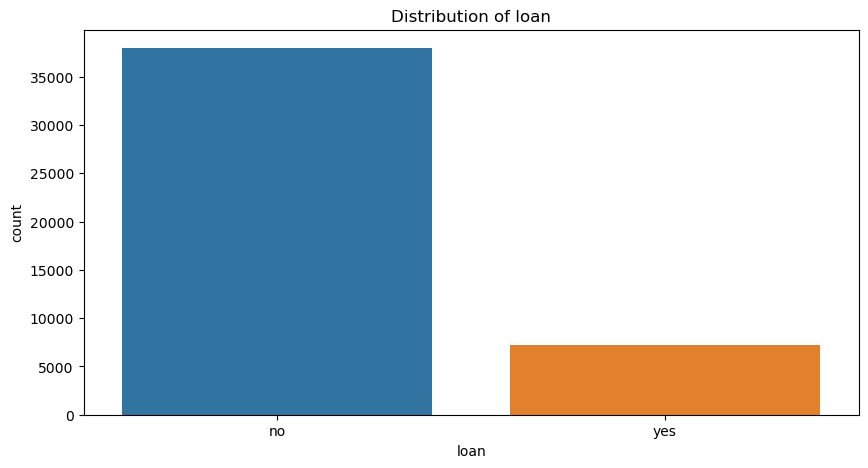

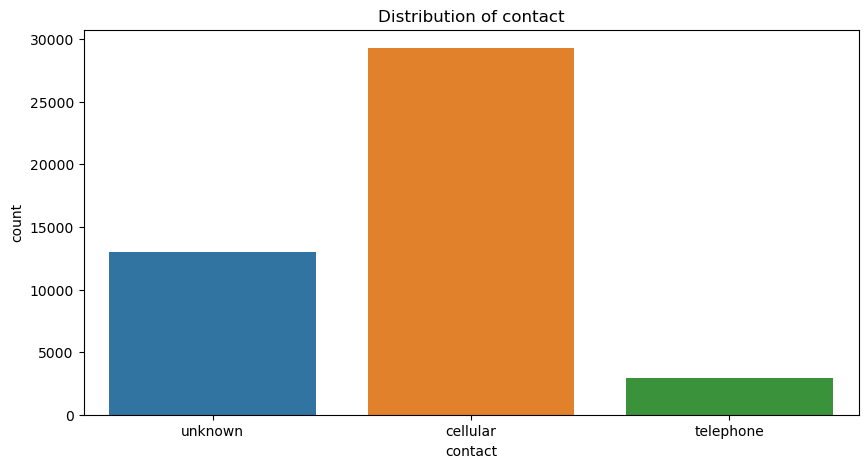

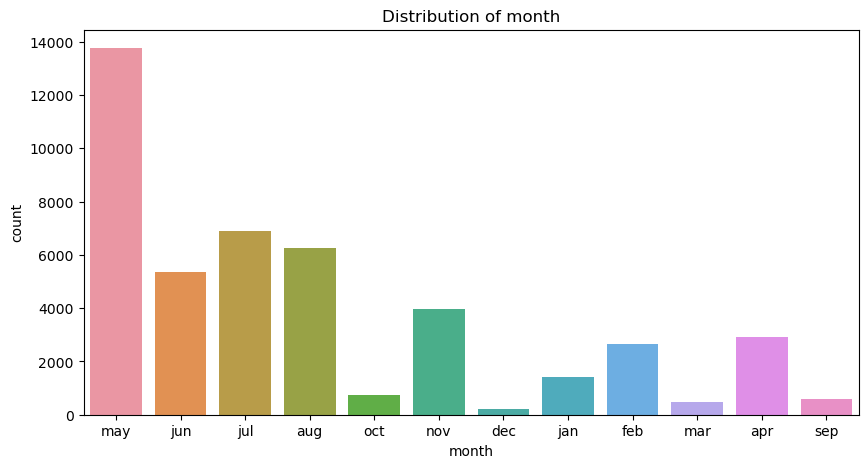

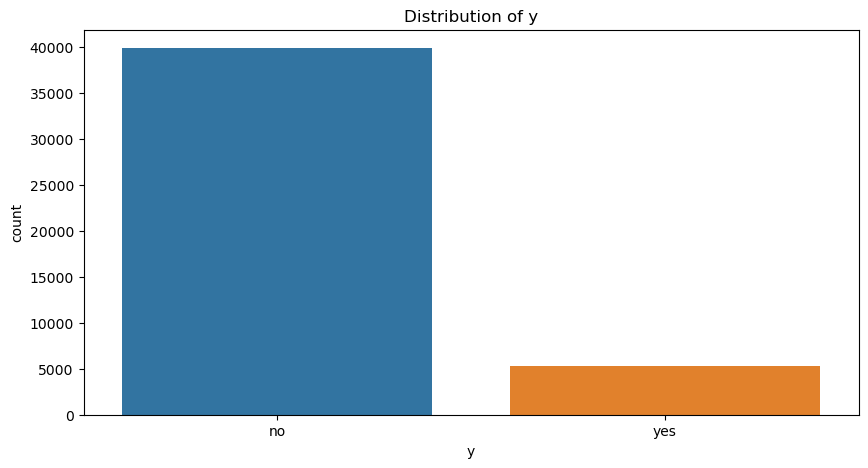

In [13]:
categorical = ["marital","education","housing","loan","contact","month","y"]

for col in categorical:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()


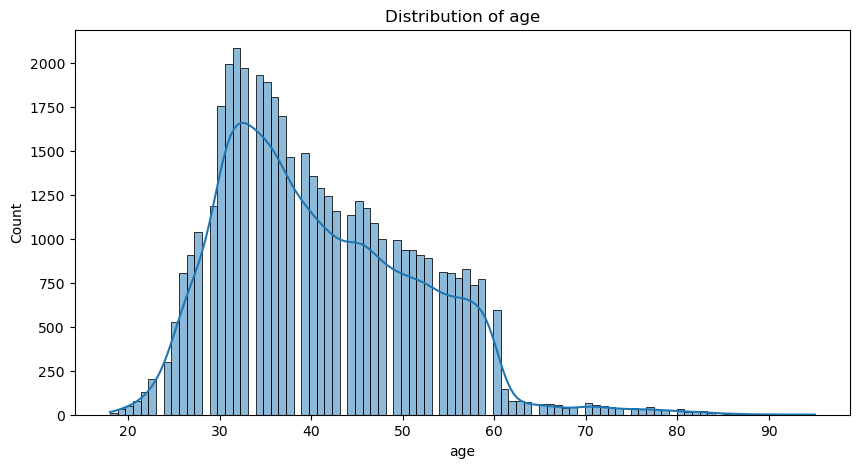

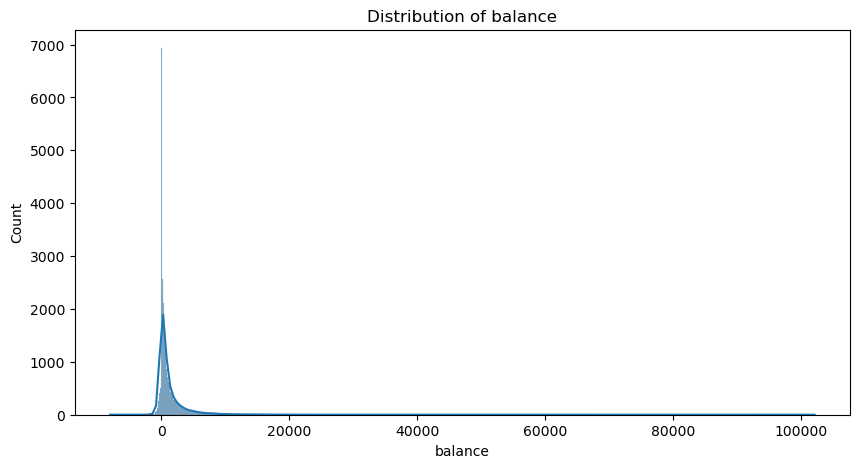

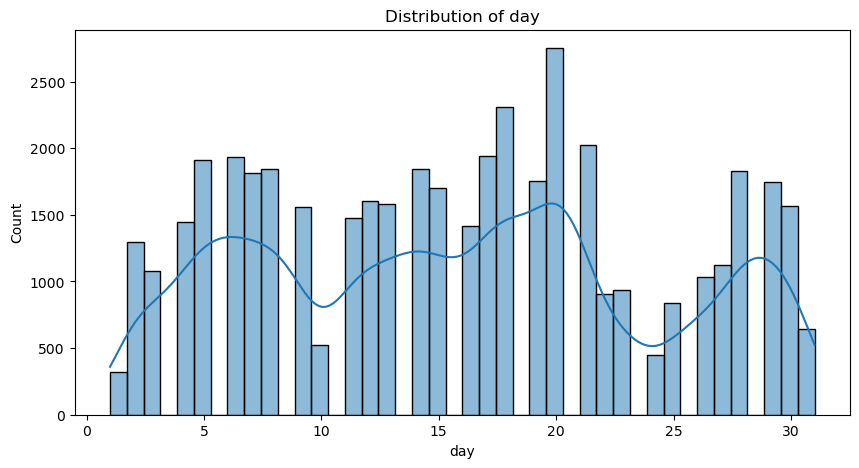

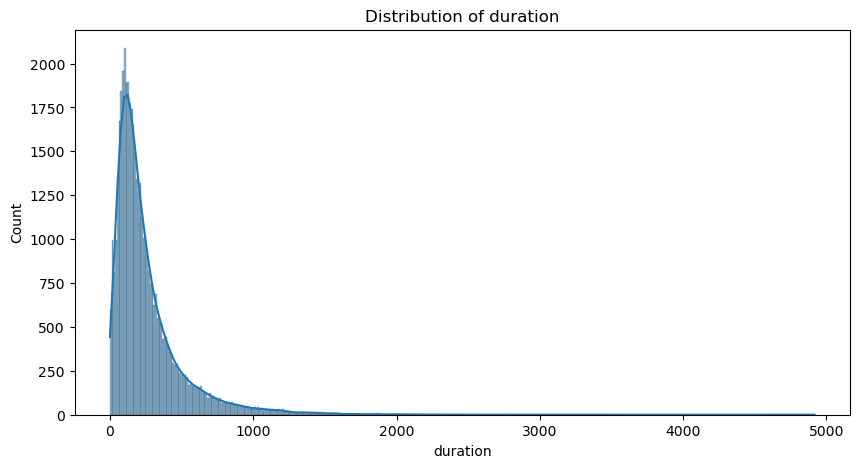

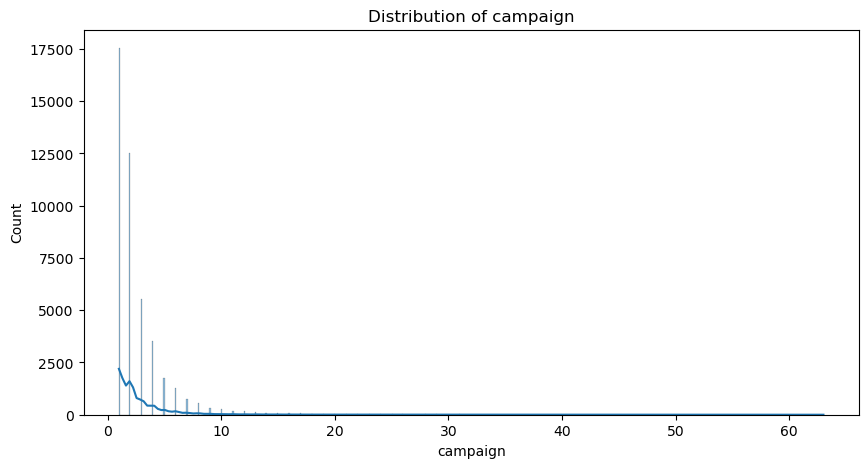

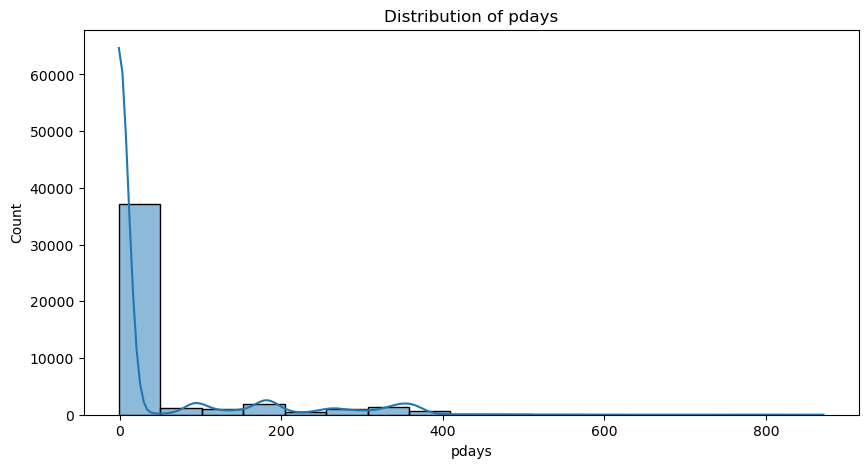

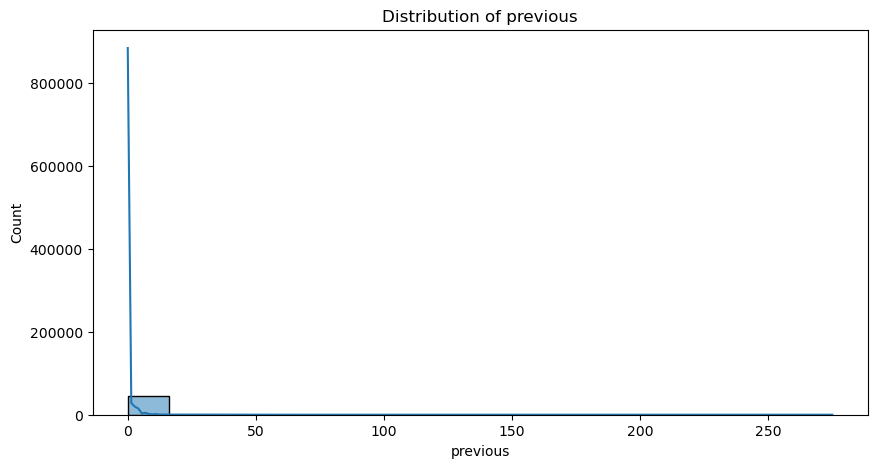

In [41]:
numerical = ['age','balance','day','duration','campaign','pdays','previous']

for num in numerical:
    plt.figure(figsize=(10,5))
    sns.histplot(df[num],kde=True)
    plt.title(f"Distribution of {num}")
    plt.show()

In [45]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


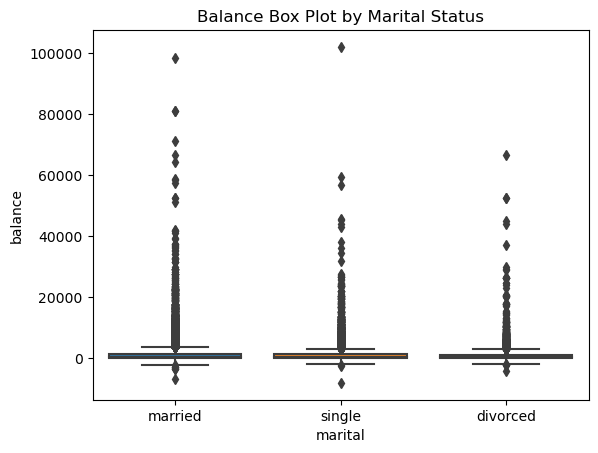

In [52]:
sns.boxplot(x='marital', y='balance', data=df)
plt.title("Balance Box Plot by Marital Status")
plt.show()

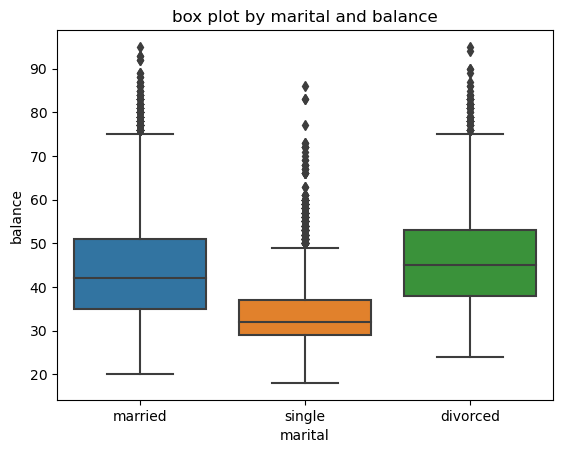

In [56]:
sns.boxplot(x='marital',y='age',data=df)
plt.title("box plot by marital and balance")
plt.xlabel("marital")
plt.ylabel("balance")
plt.show()

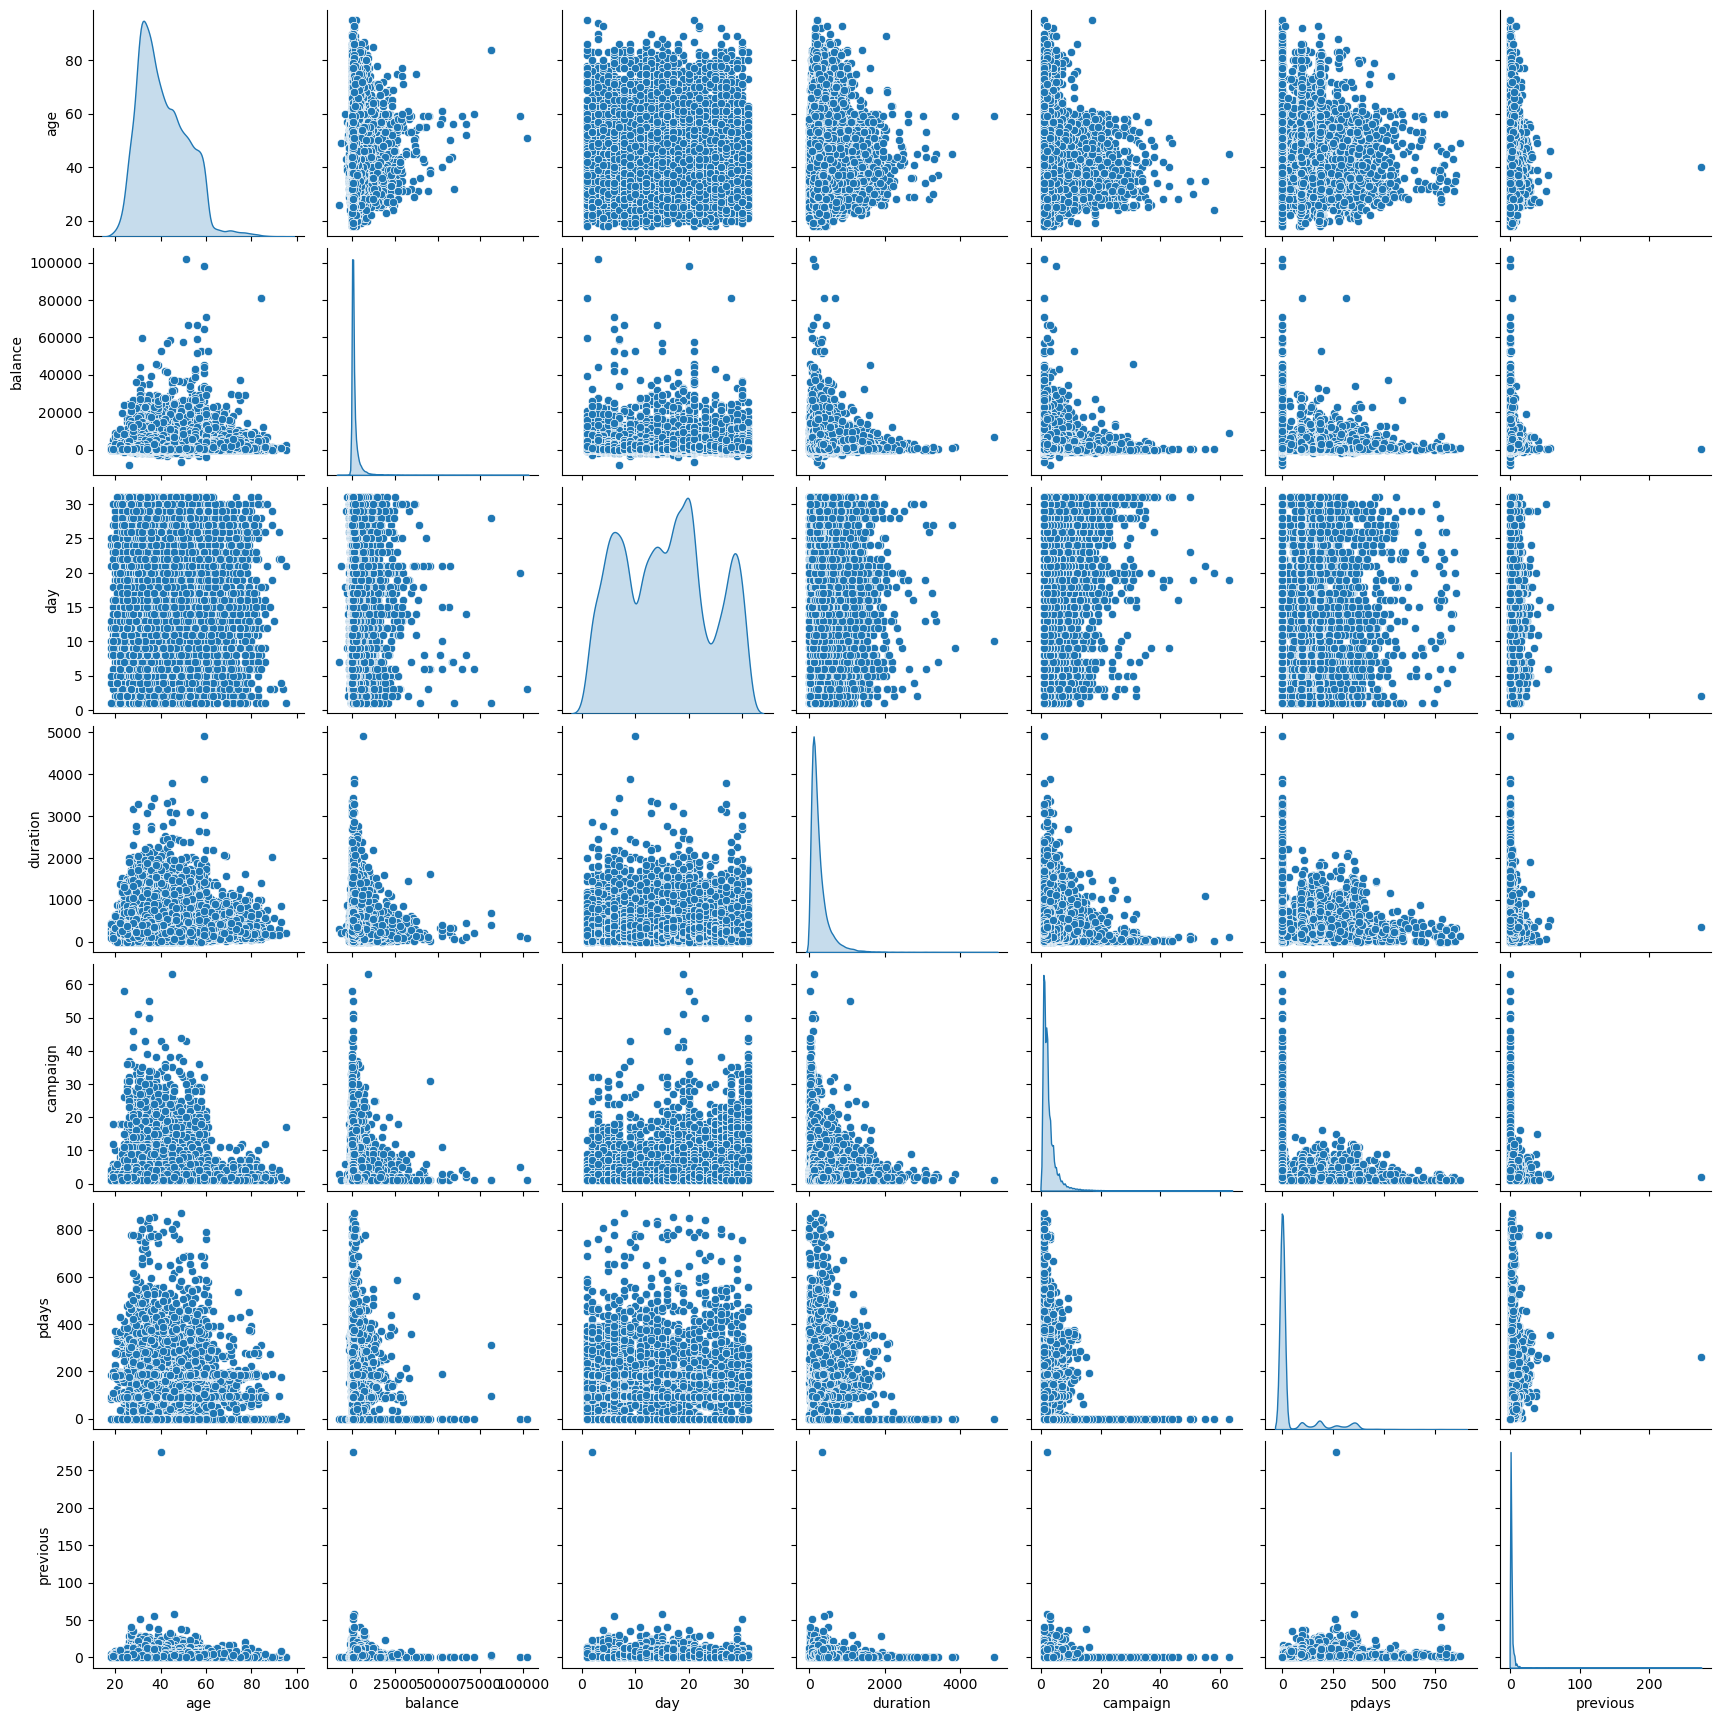

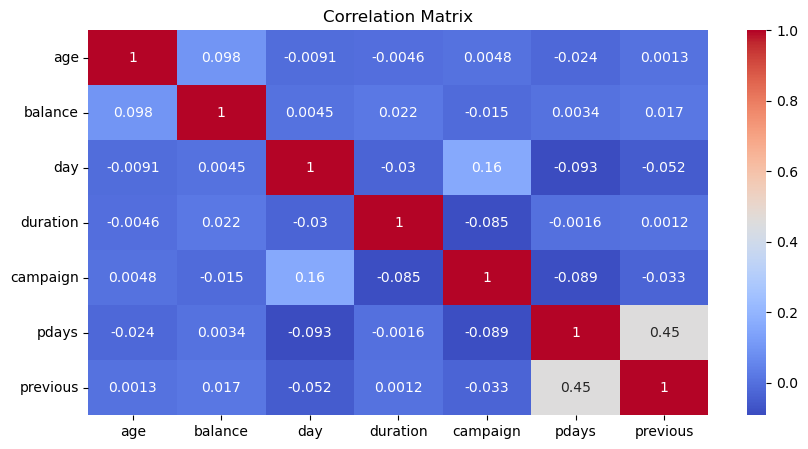

In [57]:

sns.pairplot(df[numerical], diag_kind='kde')
plt.show()

correlation_matrix = df[numerical].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Weak Correlations:
Most of the features have weak correlations with each other, as the values are close to zero. This suggests that these features are largely independent of each other, which might indicate that they capture different aspects of the data.

## Balance and Age:
The correlation between balance and age is slightly positive (0.097). This suggests that older customers might have slightly higher account balances, but the correlation is not strong.

## Campaign and Day:
The correlation between campaign (the number of contacts during the campaign) and day (the day of the month when the contact was made) is moderately positive (0.162). This could indicate that the timing of contact within the month has some relation to the number of contacts made.

## Pdays and Previous:
The strongest correlation is between pdays (number of days since the customer was last contacted in a previous campaign) and previous (the number of contacts performed before this campaign) with a value of 0.455. This suggests that customers who were contacted more frequently in previous campaigns were more likely to have been contacted recently.

## Duration and Other Features:
The duration of the last contact doesn't show a strong correlation with other features, indicating that the length of the phone call is relatively independent of other factors like balance, campaign, or previous.

## Day and Pdays:
There is a slight negative correlation between day and pdays (-0.093), suggesting that the day of the month might have a slight inverse relationship with how recently a customer was contacted in a previous campaign.